In [94]:
import nltk

In [95]:
#nltk.download_shell()

In [96]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [97]:
print(len(messages))

5574


In [98]:
for mess_no, msg in enumerate(messages[:10]):
    print(mess_no, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [99]:
messages[1] #messages are tab separated (tsv)

'ham\tOk lar... Joking wif u oni...'

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['Label','Messages'])
messages.head(10)

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [102]:
messages.describe()

,Label,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [103]:
messages.groupby('Label').describe()

Messages                                                               
         count unique                                                top freq
Label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [104]:
messages['length']=messages['Messages'].apply(len)

In [105]:
messages.head()

,Label,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


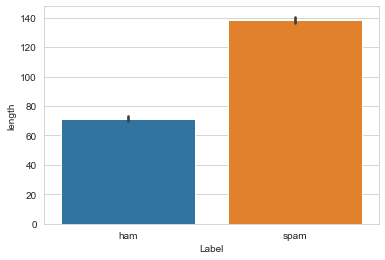

In [106]:
sns.barplot(x=messages['Label'], y=messages['length'])

### Inference:
1. It can be observed that spam messages are typically longer in terms of number of words than usual ham messages. This can be considered as an important feature to consider,

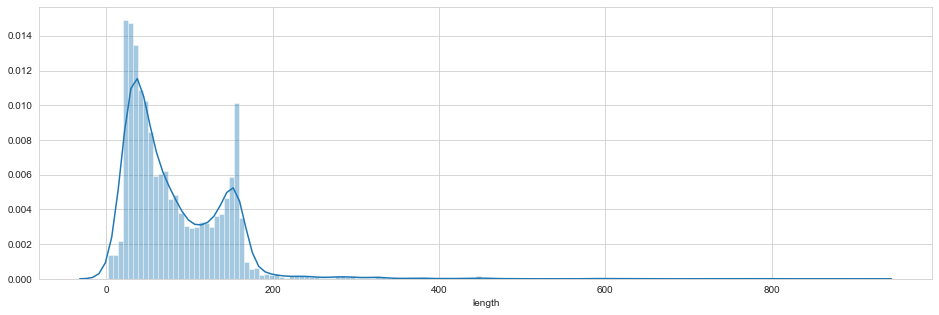

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.distplot(messages['length'],bins=150)

#### Inference:
1. We can observe a Bi-Modal behavior with the plot
2. We can also observe there are some very big text messages, since the graph is extending till 1000 words.

In [108]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

#### As we can see above the biggest message is of length 910

In [109]:
messages[messages['length'] >900]['Messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002545365BA48>,
      dtype=object)

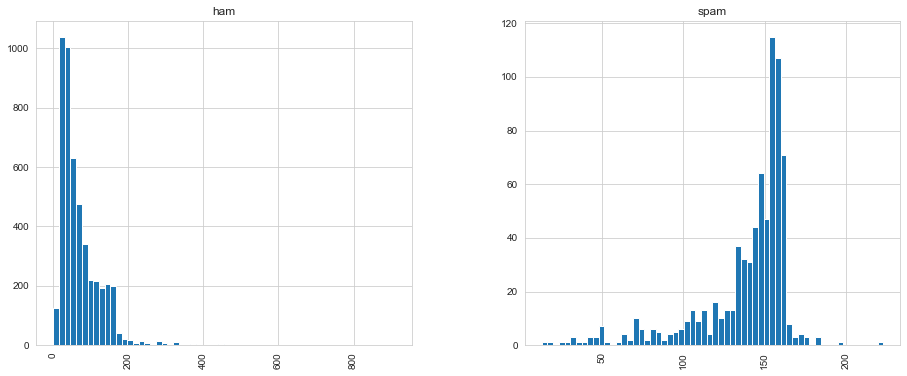

In [142]:
messages.hist(column='length', by='Label',bins=60,figsize=(15,6))

### Inference:
Spam messages have a greater length.

# Text Pre-Processing

In [144]:
import string
from nltk.corpus import stopwords

In [148]:
stopwords.words('english') # Returns list of words which don't convey much meaning

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [231]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Creating Function to perform initial text-processing.
1. Removing Punctuations from string.
2. Removing the stop words.
3. Returning the list of cleaned words.

Converting string into list of strings is called Tokenisation.

In [235]:
def text_process(msg):
    
    msg_rem_punc=[char for char in msg if char not in string.punctuation]
    
    msg_rem_punc=(''.join(msg_rem_punc)).split()
    
    msg_rem_sw=[word for word in msg_rem_punc if word.lower() not in stopwords.words('english')]
    
    return msg_rem_sw
    
    

In [239]:
messages['Messages'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Messages, dtype: object

## Vectorisation - Creating the bag of words Model
Converting the list of strings (tokens) into vectors. This is done because computer can't comprehend general strings.

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

In [241]:
bow_model = CountVectorizer(analyzer=text_process) #Creating the Bag of Words model

## Example of how BOW model works :

In [279]:
bow4 = bow_model.transform([messages['Messages'][3]]) #implementing bow model for a single message in line 4
print(bow4)
print('The following word appear twice : at index 4068 and 9554 ')

print(bow_model.get_feature_names()[4068]) #checking the words which repeated at index 4068.
print(bow_model.get_feature_names()[9554]) #checking the words which repeated at index 9554.

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
The following word appear twice : at index 4068 and 9554 
U
say


In [315]:
messages_bow_fit = bow_model.fit(messages['Messages'])

In [317]:
print(len(messages_bow_fit.vocabulary_))
messages_bow=messages_bow_fit.transform(messages['Messages'])

11425


In [319]:
print('Shape of Sparse Matrix : ', messages_bow.shape)

Shape of Sparse Matrix :  (5572, 11425)


In [320]:
print('Non zero occurences : ',messages_bow.nnz)

Non zero occurences :  50548


In [321]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsiy : {} '.format(round(sparsity)))

Sparsiy : 0 


## Term Frequency - Inverse Document Frequency (TF-IDF)

In [322]:
from sklearn.feature_extraction.text import TfidfTransformer

In [327]:
messages_tfidf_fit = TfidfTransformer().fit(messages_bow)

### Example of how TF-IDF WOrks

1. TF: Term Frequency, which measures how frequently a term occurs in a document. 

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

2. IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important.Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [328]:
tfidf4 = messages_tfidf_fit.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [332]:
print('Weight of word "u" in the document : ',messages_tfidf_fit.idf_[messages_bow_fit.vocabulary_['u']])
print('Weight of word "university" in the document : ',messages_tfidf_fit.idf_[messages_bow_fit.vocabulary_['university']])

Weight of word "u" in the document :  3.2800524267409408
Weight of word "university" in the document :  8.527076498901426


#### Transforming the BOW model to Tf-idf which results in assigning appropriate weights to words in the document.

In [340]:
messages_tfidf = messages_tfidf_fit.transform(messages_bow)
messages_tfidf.shape

(5572, 11425)

# Naive-Bayes Classifier

In [334]:
from sklearn.naive_bayes import MultinomialNB

In [341]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Label'])

Checking how our model performs on the sample example tfidf4 we have considered earlier.

In [343]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [348]:
messages['Label'][3] # Checking if its really a ham. Yes it is!!

'ham'

In [350]:
from sklearn.model_selection import train_test_split

In [352]:
msg_train,msg_test, label_train, label_test = train_test_split(messages['Messages'], messages['Label'], test_size=0.3)

In [353]:
from sklearn.pipeline import Pipeline

In [355]:
pipeline = Pipeline([
    ('BOW Model', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('TFIDF Creation', TfidfTransformer()),          # integer counts to weighted TF-IDF scores
    ('NB Classifier', MultinomialNB())        # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [356]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('BOW Model',
                 CountVectorizer(analyzer=<function text_process at 0x000002545398F5E8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TFIDF Creation',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('NB Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         ve

In [357]:
messages_predictions = pipeline.predict(msg_test)

## MODEL CLASSIFICATION REPORT

In [358]:
from sklearn.metrics import classification_report

In [359]:
print(classification_report(label_test,messages_predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1439
        spam       1.00      0.72      0.84       233

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

